# Lecture 6/7: Bayesian Formalism Part II and Markov Chain Monte Carlo
AM207: Verena Kaynig-Fittkau,and Pavlos Protopapas, Harvard University


# Announcements

- HW1 is over and being graded
- HW2 is out and due on Wednesday 

- Webpage now has page for lecture materials.
- Lab notebooks from 2014 are on github

### Final Project Schedule

- March 27 -- April 06: Talk to TFs and come up with a proposal
- April 7: Proposals are due
- April 29: Submit your project notebook/paper (6 pages)
- May 4: Submit your poster and screencast (3min), and optional: webpage
- May 6: Show off at SEAS Science Fair




In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

### Example: Markov Chain

consider a life insurance company that wants to find out how much money to charge its clients. 
The company wants to estimate how long the clients will live. It proposes the following model summarizing the state of health of an individual on a monthly basis: healthy, sick and dead with transition graph shown in figure below 

![markov example](./Lecture06_07_data/Markov_ex1.png)

The transition matrix for this example is 
<div class="custom-class" align="center">
$$\left[ \begin{array}{ccc}
0.69 & 0.3 & 0.01 \\
0.8 & 0.1 & 0.1 \\
0 & 0 & 1 \end{array} \right] $$
</div>
If the probability vector for the initial state is $\mu(x^{(1)}) = (0.5, 0.2, 0.3)$ 
it follows that $\mu(x^{(1)})T =  (0.5050, 0.1700, 0.3250)$ and, after several iterations (multiplications by T ), the product will converge to $p(x) =(0.0178,0.0062,0.9760)$ [all dead].
No matter what initial distribution we use, the chain will stabilize at $p(x) = (0.0, 0.0, 1.0)$. 

When initializing each Markov chain, the chain will wander in state space around the
starting state. Therefore, if we start a number of chains, each with different initial conditions,
the chains will initially be in a state close to the starting state. This period is called the
__burnin__. An important property of Markov chains is that the starting state of the chain no
longer affects the state of the chain after a sufficiently long sequence of transitions (assuming
that certain conditions about the Markov chain are met). At this point, the chain is said
to reach its steady state and the states reflect samples from its stationary distribution. This
property that Markov chains converge to a stationary distribution regardless of where we
started (if certain regularity conditions of the transition function are met), is quite important.
When applied to MCMC, it allow us to draw samples from a distribution using a sequential
procedure but where the starting state of the sequence does not affect the estimation process.

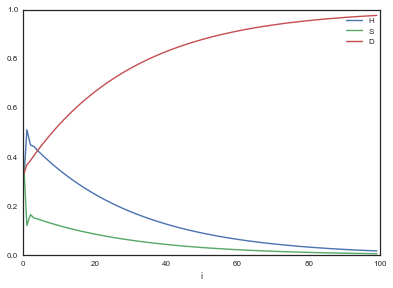

In [2]:
# Simple example for MARKOV CHAIN

# transition matrix
#T = np.array([[0.69, 0.3, 0.01],[ 0.8, 0.1, 0.1] ,[ 0,0.1 ,0.9]])
T = np.array([[0.69, 0.3, 0.01],[ 0.8, 0.1, 0.1] ,[ 0 , 0 ,1]])

# initial state USE RANDOM NUMBERS
p = np.random.uniform(low=0,high=1, size=3)
# normalize 
p = p/np.sum(p)

# do 100 iterations
q=np.zeros((100,3))
for i in np.arange(0,100):
    #compute probability for each state
    q[i, :] = np.dot(p,np.linalg.matrix_power(T,i))

plt.plot(q)
plt.xlabel('i')
plt.legend( ('H', 'S', 'D'))



### Example: Markov Chain Sampling
In this example we sample from $p(x) =6x(1-x)$ using the Metropolis algorithm with proposal 
distribution 

$$x^* \sim N(x, 0.6) $$

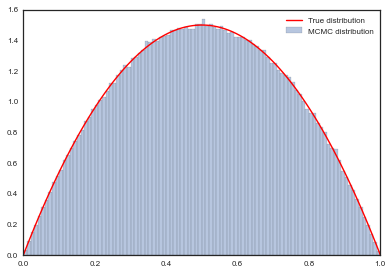

starting point was  0.396886608176


In [6]:
## FUNCTIONS 
# target distribution p(x) 
p = lambda x: 6*x*(1-x)

# number of samples
n = 2000000

# sigma for our proposal distribution
# corresponds to step size
sig = 0.6

#intitialize the sampling. Start somewhere from 0..1
x0 = np.random.uniform()
#x0 = 0.00000001

x_prev = x0

x = [] # to save our samples

for i in xrange(n):
    # sample new state candidate from proposal distribution
    x_star = np.random.normal(x_prev, sig)

    #while  (x_star <0) | (x_star > 1):  # make sure you stay within bounds
    #    x_star = np.random.normal(x_prev, sig)
       
    P_star = p(x_star)
    P_prev = p(x_prev)
    U =  np.random.uniform()
    
    # A is simple because our transition probability is symmetric (Metropolis only)
    A =  P_star/P_prev # did we go up or down? 
       
    if U < A: #coin flip to see if we accept
        x_prev = x_star 

    x.append(x_prev) # we always get a sample question just is if we stay or move on

# plot our sample histogram
plt.hist(x,100, alpha=0.4, label=u'MCMC distribution', normed=True) 

#plot the true function
xx= np.linspace(0,1,100)
plt.plot(xx, p(xx), 'r', label=u'True distribution') 
plt.legend()

plt.show()
print "starting point was ", x0

Note: The part where we rejected new proposals if they fell outside the desired range made our sampling wrong. What is basically happening is that we are then sampling from a truncated proposal, and this truncated proposal is not normalized. Normalizing against this actually made the computation much slower, so in this case I would just comment those lines out. The function is negative anyways if we try to go out of the defined bounds, so it all works out for this example.
If you want to read in more detail about this, please look at this [blog post](https://darrenjw.wordpress.com/2012/06/04/metropolis-hastings-mcmc-when-the-proposal-and-target-have-differing-support/) from Darren Wilkinson.